# Fichier principal

## SDES

### SDES double chiffrement/déchiffrement

In [10]:
import ipynb.fs.full.SDES as SDES

message = "Test de chiffrement avec le double SDES"

# Chiffrement d'un message avec le double SDES
message_chiffre = SDES.double_encrypt_text(message, 143, 977)
print("Message chiffré avec le double SDES : ", message_chiffre)

# Déchiffrement d'un message avec le double SDES
message_dechiffre = SDES.double_decrypt_text(message_chiffre, 143, 977)
print("Message déchiffré avec le double SDES : ", message_dechiffre)

Message chiffré avec le double SDES :  :éØÎÉÌéÉ(ákkréÿéNÎÉA¾é(ÉéÉÌoZBéÉs­s
Message déchiffré avec le double SDES :  Test de chiffrement avec le double SDES


### SDES cassages

In [11]:
# Cassage brtual
print(SDES.cassage_brutal(message, message_chiffre))

# Cassage astucieux
print(SDES.cassage_astucieux(message, message_chiffre))

(143, 977)
(143, 977)


## RSA

### Création des clés (publique et privée, 2048 bits)

In [12]:
import ipynb.fs.full.RSA as RSA

# Création des clés provate.pem et public.pem dans data
RSA.generer_couple_cles()


### RSA chiffrement/déchiffrement

In [13]:
import os

message = b'Test de chiffrement avec le RSA'

# Récupération des clés
private_key = open(os.path.join('../data', 'private.pem')).read()
public_key = open(os.path.join('../data', 'public.pem')).read()

# Chiffrement d'un message avec le RSA
ciphertext = RSA.encrypt(message, public_key)
print("Le message chiffré avec le RSA :", ciphertext)

# Déchiffrement d'un message avec le RSA
decrypted = RSA.decrypt(ciphertext, private_key)
print("Le message déchiffré avec le RSA :", decrypted)

Le message chiffré avec le RSA : b"N`\xbe\x9fW\x1b\x0b\x0485\x96\xe0\x1c\t\x1e\xcc\xc30\xa5i\xf7\xba\xc9\xd9\x16\xd7E\xad\xd4@\x16J;xC\x05\x86\xd8mJ\x1ePf\xa2=\xa1\x00\x13\x9b\x8d\x82x\xa3V\xfaZ#\xc4B\xfaa\xfb\xce\x96\x13\x9a\x96\xb7?F\x97\xca]\xb8R\x08.\xb8\xd5\xd2\x99\xed\xef\x12\xc8\x9e\xfe\x8d\x0c\xb2\xeb\xfdv\xfcZ\xb4\x8e\xae\xe8r\x1a\x17\xec\xcc\x9d\xde\x9b'\x7f\xfa\xaac\x08Q\x9b\xec\xcawS\x80\x11W\xa1\xbd\xeb\x9d\xcd\xa4\xb6\xfca\xb4.\xc4\x85\x19\xf0\x81+\xab\xbb>8\xf3(--Y\x06!\xdb~\xabX\x01\x9b\x9b\x8b\xab\n\x89\x9e\xfc\x14\\+\x8b\xfbQ\xeb\xf0\xf3\xbb\t\x9d\x87\x86\xb1\xb2\x198\xa0\xa4s\x00\xee\xe9hI\xee'ig\xa2\x7f\x93\x80\xf9\xd20\xfaYU\xf7Y\xcb9\xc2\xfbx\x02\xc4\x80\xcc/\x1fL\x01\xe9\x8f\x16>Jb\xdc\x08\xd3\xda\xc0S\xa1|h\x16\x05^\x8b;\x07\xf7\xd2\xd2y\x9d\x15\xefw~\xc0\xec=4~\xc3\xbbf"


Le message déchiffré avec le RSA : Test de chiffrement avec le RSA


# AES

### AES chiffrement/déchiffrement

In [14]:
import ipynb.fs.full.AES as AES
import random

message = b'Test de chiffrement AES avec CBC et un padding PKCS7'

# Création d'une clé aléatoire de 128 bits
key = ''.join([str(random.randint(0, 1)) for _ in range(128)])
key = int(key, 2).to_bytes(len(key) // 8, byteorder='big') # Conversion en bytes

# Chiffrement d'un message avec AES
ciphertext = AES.encrypt(key, message)
print("Le message chiffré avec AES :", ciphertext)

decrypted = AES.decrypt(key, ciphertext)
print("Le message déchiffré avec AES :", decrypted)

Le message chiffré avec AES : b'\x17\xf2\x0b\x85*\xceG\xe1X\xba\xe9\xedB\x7fm&\x1e(\xa4VZ?2B]q\xac\x8ca\xa4\xcb\x05d\xb5!\xebRM\xef\x117\xd6\x00f\x9e\x92\xa4\xbf\x07x\x99\xb88@\xd3\x83\xcc\x11\xcd\x7fd[\xc2\xc9\x1a\xffr\xca\xf7\x87\x10\x909#`h\xf4\xd6\x03\xff'
Le message déchiffré avec AES : Test de chiffrement AES avec CBC et un padding PKCS7


### Recherche d'une clé de chiffrement AES dans une image

In [15]:
# Récupération de la clé dans l'image rossignol2.bmp
key = AES.dechiffrer_image(os.path.join('../data', 'rossignol2.bmp'))
print(f'La clé contenu dans l\'image rossignol2.bmp est : {key} (en hexadécimal : {hex(int(key, 2))})')

La clé contenu dans l'image rossignol2.bmp est : 1110011101101101001100010011111110010010101110011001000001001100 (en hexadécimal : 0xe76d313f92b9904c)


# Trace réseau

### Filtrage des paquets

In [16]:
import ipynb.fs.full.trace_reseaux as tr

# Filtrage des paquets UDP envoyés et reçus sur le port 9999
paquets = tr.get_messages_UDP_9999(open(os.path.join('../data', 'trace_sae.cap'), 'rb'))
print(paquets)


[<Ether  dst=f2:c8:3c:4a:4f:48 src=ee:9f:5f:0f:f5:b5 type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=76 id=23383 flags=DF frag=0 ttl=64 proto=udp chksum=0xcb3f src=10.0.0.5 dst=10.0.0.6 |<UDP  sport=9999 dport=9999 len=56 chksum=0x5232 |<Raw  load="\\xe5\\xc4\x17\x1c\\xb3\x030\\x99\\xb6I\\xcc\\xf847\\x8c\\x9b\\xd7ć\x16U\\x84gh]\\xe7\\xd8Ȏ\x0cϷ\\xf7\\xe2hy\x1b\x181z\\x9d\\xae\x05\\xa7'!\\xfe\\xed" |>>>>, <Ether  dst=ee:9f:5f:0f:f5:b5 src=f2:c8:3c:4a:4f:48 type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=76 id=60989 flags=DF frag=0 ttl=64 proto=udp chksum=0x3859 src=10.0.0.6 dst=10.0.0.5 |<UDP  sport=9999 dport=9999 len=56 chksum=0x110a |<Raw  load='ՊŽ,:D\\x96\\xc0\\xcbz\\x80@G\\xec\\x83\x07%S\\x82V\\x9dҝ\\x81\\xf3\\xb7(\x17\\xeb%\\x9a\\xdcG\\xca\\xden=S\\x97WWW\\\\x98\\x95mR' |>>>>]


### Déchiffrement du payload des paquets chiffrés avec AES

In [17]:
# La clé contenue dans l'image rossignol2.bmp multipliée par 4
key = "1110011101101101001100010011111110010010101110011001000001001100111001110110110100110001001111111001001010111001100100000100110011100111011011010011000100111111100100101011100110010000010011001110011101101101001100010011111110010010101110011001000001001100"
key = int(key, 2).to_bytes(len(key) // 8, byteorder='big') # Conversion en bytes
# Déchiffrement des paquets UDP envoyés et reçus sur le port 9999 avec affichage des sources et messages
print(tr.decrypt_traffic(os.path.join('../data', 'trace_sae.cap'), key))

[{'ee:9f:5f:0f:f5:b5': "La crypto c'est trop bien!"}, {'f2:c8:3c:4a:4f:48': "Je suis complètement d'accord!"}]


# Expérimentations sur les différents algorithmes

### Graphiques sur les temps d'exécution des deux méthodes de cassages de SDES

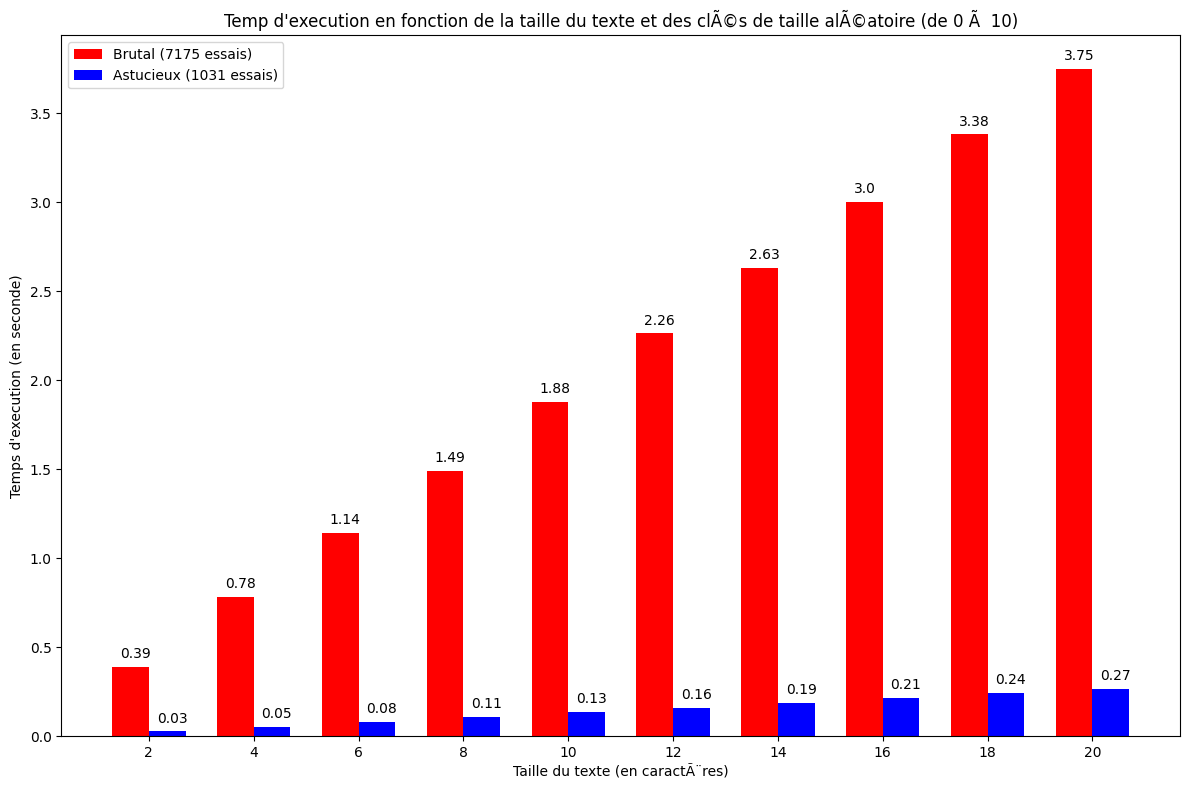

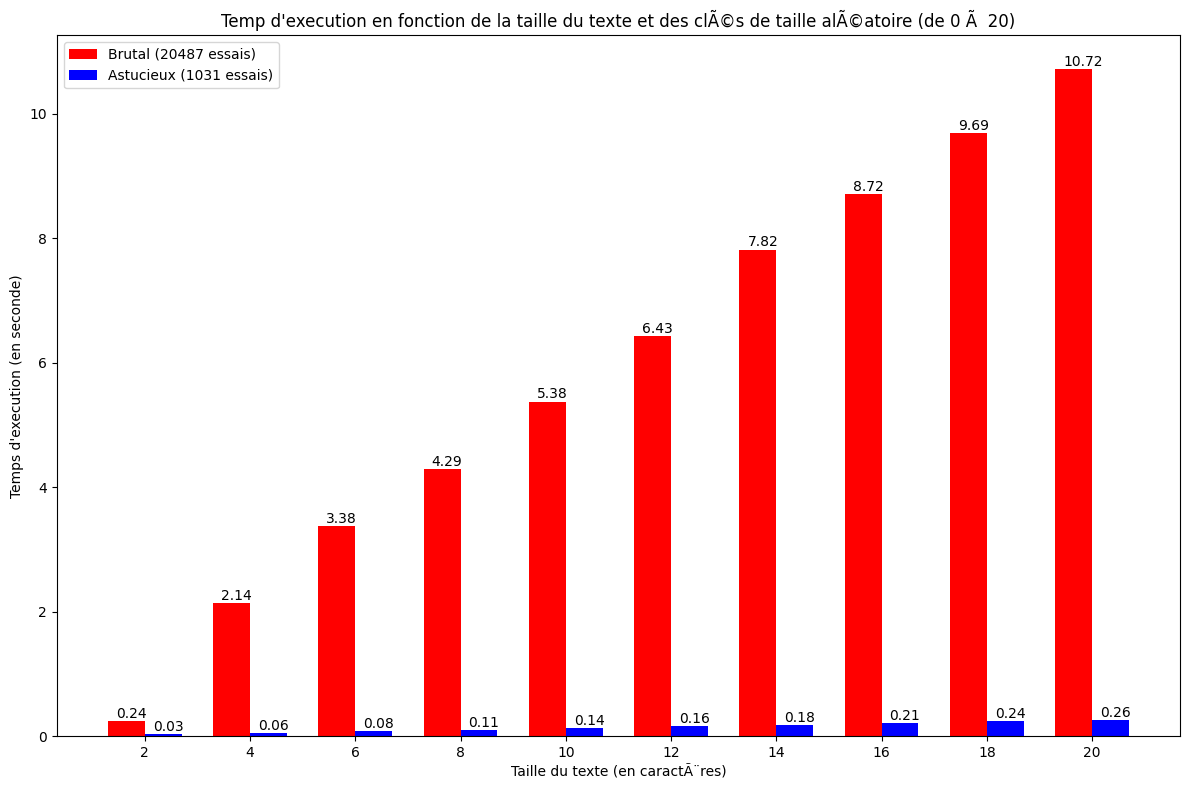

In [18]:
import ipynb.fs.full.SDES as SDES
import os

# Définition des textes à utiliser pour les graphiques allant de 2 à 20 caractères
lettres_persanes = open(os.path.join('../data', 'lettres_persanes.txt'), 'r').read()
arsene_lupin_extrait = open(os.path.join('../data', 'arsene_lupin_extrait.txt'), 'r').read()
liste_texte_1 = [lettres_persanes[:2], arsene_lupin_extrait[:4], lettres_persanes[:6],
                 arsene_lupin_extrait[:8], lettres_persanes[:10], arsene_lupin_extrait[:12],
                 lettres_persanes[:14], arsene_lupin_extrait[:16], lettres_persanes[:18],
                 arsene_lupin_extrait[:20]]
liste_texte_2 = [arsene_lupin_extrait[:2], lettres_persanes[:4], arsene_lupin_extrait[:6],
                  lettres_persanes[:8], arsene_lupin_extrait[:10], lettres_persanes[:12],
                  arsene_lupin_extrait[:14], lettres_persanes[:16], arsene_lupin_extrait[:18],
                  lettres_persanes[:20]]

# Affichage des graphiques
# Le premier graphique représente le temps d'exécution en fonction de la taille du texte et d'une clé de taille aléatoire entre 0 et 10
# Le deuxième graphique représente le temps d'exécution en fonction de la taille du texte et d'une clé de taille aléatoire entre 0 et 20
SDES.graphique_temps_execution_cassages(liste_texte_1, 10)
SDES.graphique_temps_execution_cassages(liste_texte_2, 20)

### Graphiques sur les temps de chiffrement/déchiffrement du RSA et de l'AES

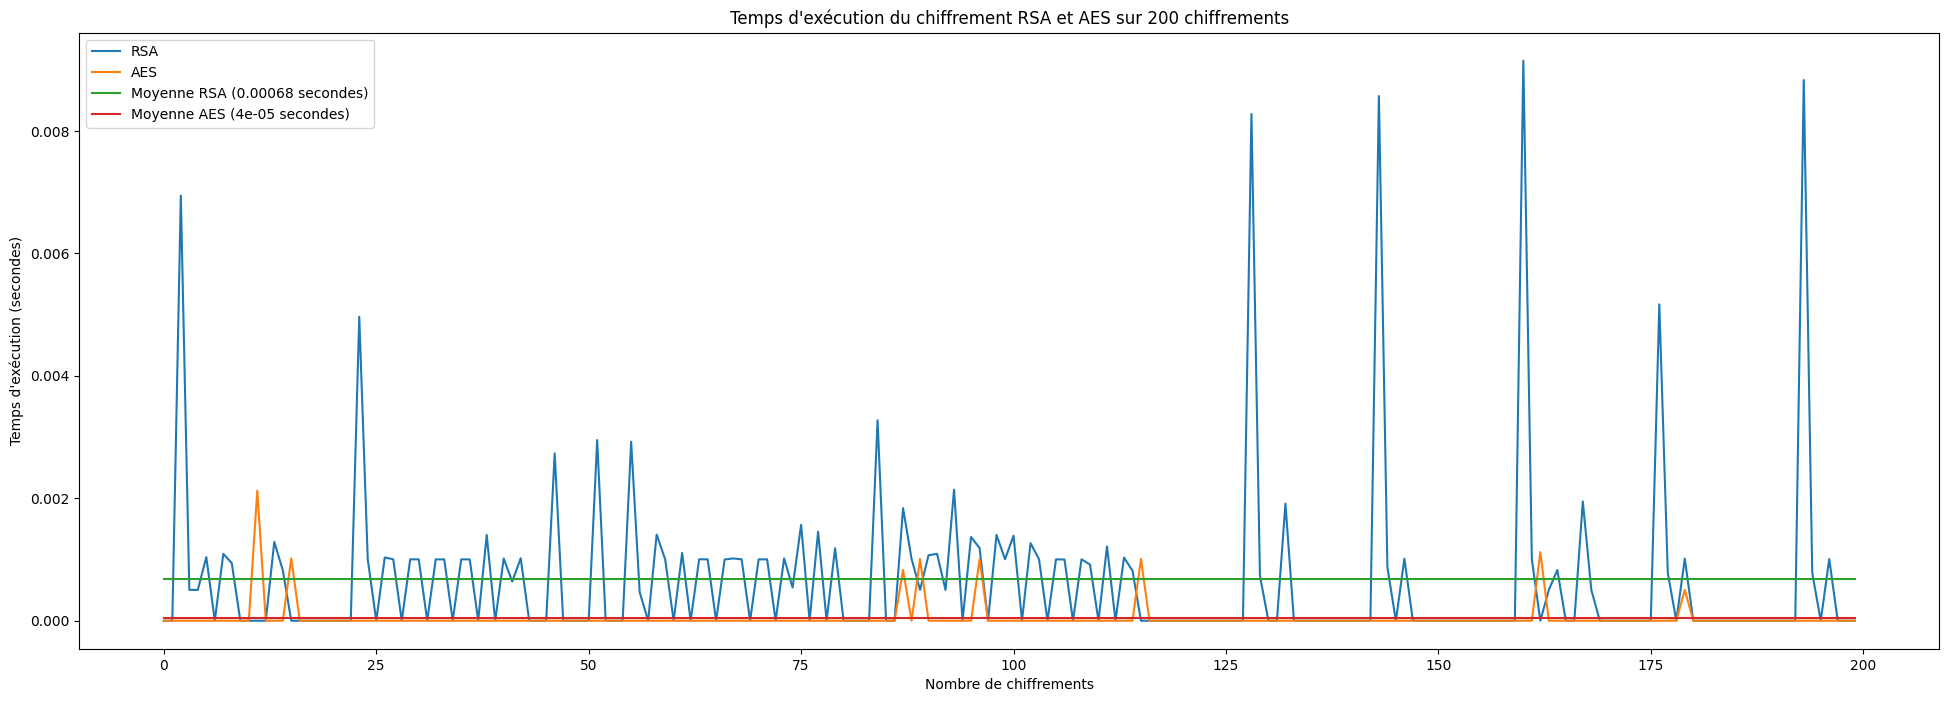

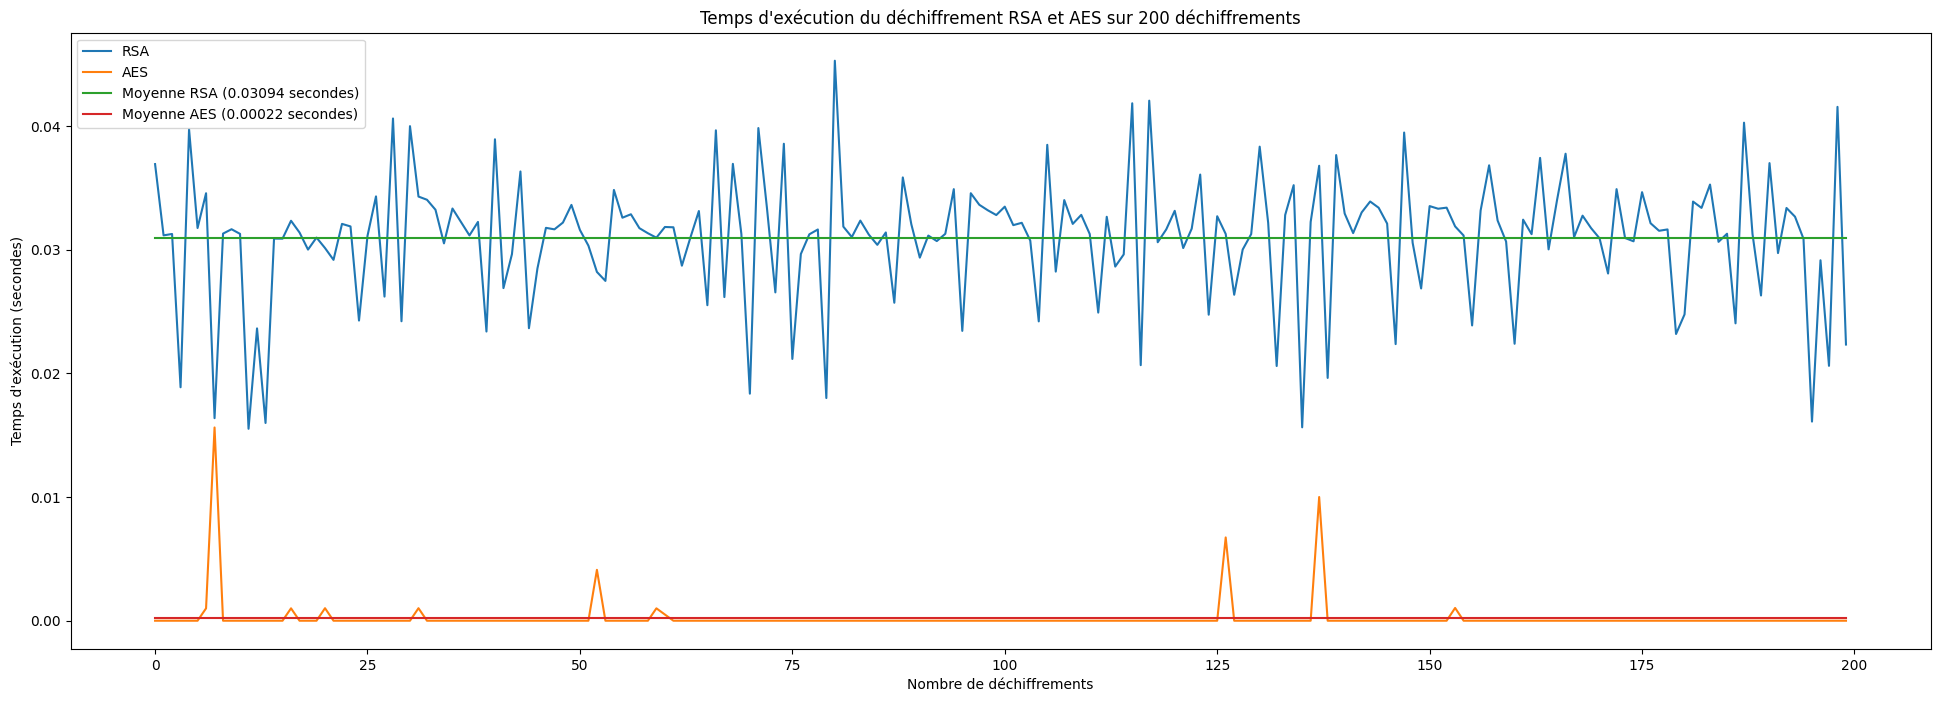

In [23]:
from ipynb.fs.full.experiences import temps_execution_chiffrement, temps_execution_dechiffrement
import random
import string
import nbimporter
from experiences import temps_execution_chiffrement, temps_execution_dechiffrement

# Définition d'un message au hasard de 214 caractères
message = ''.join(random.choice(string.ascii_letters + string.digits) for _ in range(214))

# Affichage des graphiques
# Le premier graphique représente le temps d'exécution du chiffrement des deux méthodes sur 200 itérations
# Le deuxième graphique représente le temps d'exécution du déchiffrement des deux méthodes sur 200 itérations
temps_execution_chiffrement(message, 200)
temps_execution_dechiffrement(message, 200)
